In [6]:
import matplotlib.pyplot as plt

def extract_values(file_path, start_line, end_line):
    '''
    Args:
        file_path: path to the log file
        start_line: the line number to start extracting
        end_line: the line number to end extracting

    Returns:
        test_errors: a list of test errors
        linear_corr_coeffs: a list of linear correlation coefficients
        spearman_corr_coeffs: a list of Spearman rank correlation coefficients
        kendall_tau_coeffs: a list of Kendall Tau rank correlation coefficients
        
    '''
    test_errors = []
    linear_corr_coeffs = []
    spearman_corr_coeffs = []
    kendall_tau_coeffs = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Extract the desired lines
        selected_lines = lines[start_line-1:end_line]

        # Process each line until epoch 250
        for line in selected_lines:
            if "EPOCH: 251" in line:break
            
            if "---[UTTERANCE] Test error=" in line:
                test_error = float(line.split('=')[1])
                test_errors.append(test_error)
            elif "---[UTTERANCE] Linear correlation coefficient=" in line:
                linear_corr_coeff = float(line.split('=')[1])
                linear_corr_coeffs.append(linear_corr_coeff)
            elif "---[UTTERANCE] Spearman rank correlation coefficient=" in line:
                spearman_corr_coeff = float(line.split('=')[1])
                spearman_corr_coeffs.append(spearman_corr_coeff)
            elif "---[UTTERANCE] Kendall Tau rank correlation coefficient=" in line:
                kendall_tau_coeff = float(line.split('=')[1])
                kendall_tau_coeffs.append(kendall_tau_coeff)

    return test_errors, linear_corr_coeffs, spearman_corr_coeffs, kendall_tau_coeffs

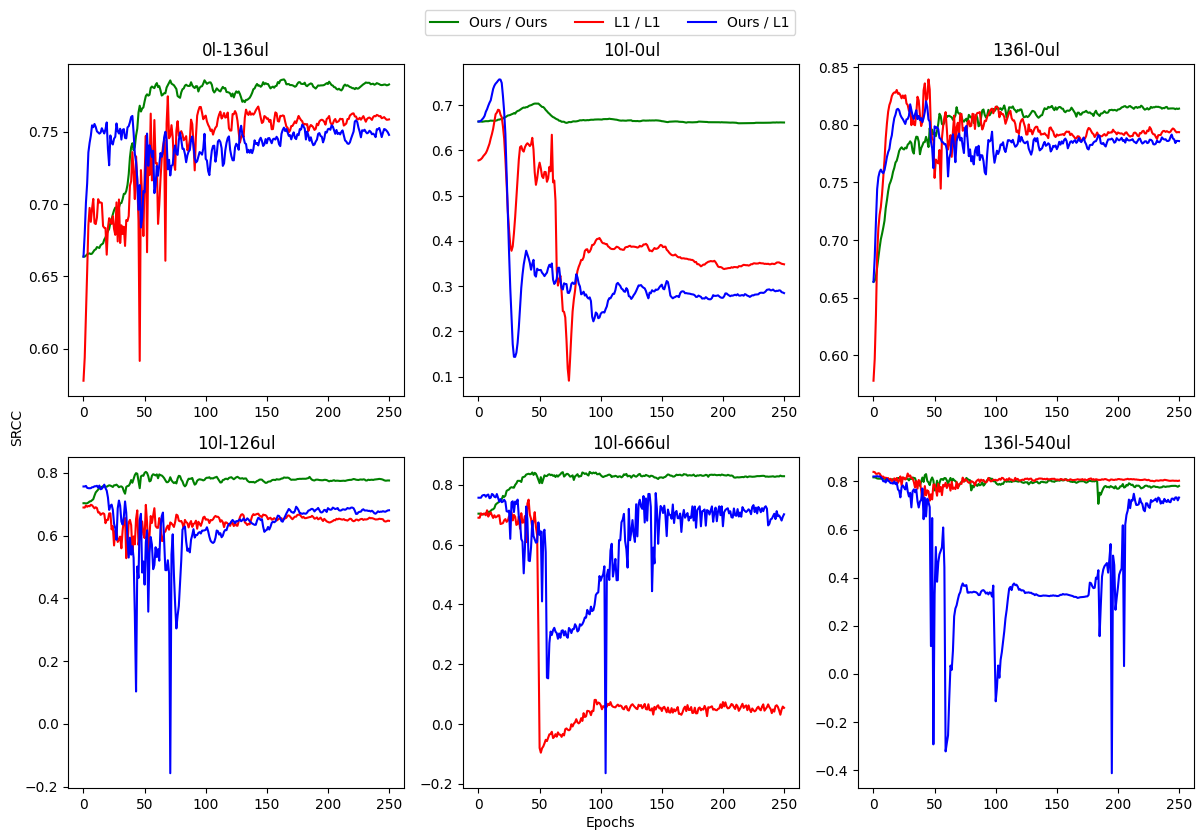

In [8]:
names = ['0l-136ul', '10l-0ul', '136l-0ul', '10l-126ul', '10l-666ul', '136l-540ul']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))


for i, name in enumerate(names):
    row = i // 3  # Calculate the row index
    col = i % 3  # Calculate the column index

    ax = axes[row, col]  # Get the corresponding subplot axes

    for bb, j in enumerate([name, f"mse/{name}", f"mse_ours/{name}"]):
        # Example usage
        # print(j)
        if j not in ['dummy']:
            file_path = f"/home/smg/v-yadav/cooper/again/redo_finetune_ssl_hemant_non_linear_semi/{j}/testset.out.txt"
        else:
            file_path = f"/home/smg/v-yadav/cooper/again/finetune_ssl_hemant_non_linear_semi/{j}/out.txt"
        start_line = 1  # Starting line number (e.g., the first line after "---Starting training---")
        end_line = 10052  # Ending line number (inclusive)

        test_errors, linear_corr_coeffs, spearman_corr_coeffs, kendall_tau_coeffs = extract_values(file_path, start_line, end_line)

      
        # Set linestyle as dotted for js ending with "_mse"
        linestyle = "-" 
        label = 'our'
        
        if j.startswith("mse/"): label = 'mse'
        if j.startswith("mse_ours/"): label = 'mse_ours'
        # print(label)
        if label == 'mse':
            ax.plot(spearman_corr_coeffs, label = 'L1 / L1',linestyle=linestyle, color='red')
            # ax.plot(kendall_tau_coeffs, linestyle=linestyle, marker='+', color='blue')
        elif label == 'mse_ours':
            ax.plot(spearman_corr_coeffs, label = 'Ours / L1', linestyle=linestyle, color='blue')
            # ax.plot(kendall_tau_coeffs, linestyle=linestyle, marker='*', color='blue')
        else: 
            ax.plot(spearman_corr_coeffs, label = 'Ours / Ours', linestyle=linestyle, color='green')
            # ax.plot(kendall_tau_coeffs, label='Ktau', linestyle=linestyle, color='blue')

    # ax.axvline(x=51, color='green', linestyle='dashdot')
    ax.set_title(f"{name}")
    # ax.legend(ncol=3)
    # ax.set_ylim(-0.4, 1)

# Create a global legend
plt.figlegend(*ax.get_legend_handles_labels(), loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.03))
# Define axis numbering globally
fig.text(0.5, 0.00, 'Epochs', ha='center')
fig.text(0.00, 0.5, 'SRCC', va='center', rotation='vertical')

plt.tight_layout()  # Adjust the spacing between subplots
# plt.savefig('srccktau.png', dpi=600)
plt.show()  # Display the combined plot
